<a href="https://colab.research.google.com/github/Nurdaylight/An-Econ-771/blob/main/PS1/Metrics_ps_1_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading data from GIT




In [1]:
# save to    /PS1
import timeit
import urllib.request

url = "https://raw.githubusercontent.com/Nurdaylight/An-Econ-771/main/PS1/data/ps1.csv"
file_path = "/content/ps1.csv"

# Download the file
with urllib.request.urlopen(url) as response:
    content = response.read().decode('utf-8')

with open(file_path, "w") as f:
    f.write(content)

print("Downloaded to", file_path)



#num_runs = 10000
#t = timeit.timeit(invert_matrix, number=num_runs)
#print(f"Average time per run: {t / num_runs * 1e6:.3f} μs")


Downloaded to /content/ps1.csv


### Reading and preparing data as Float instead of STR

In [21]:
with open(file_path, "r") as f:
    next(f)

    data_v = [float(val) for line in f for val in line.strip().split(",")]

#Slice the vector to get each variable

y=data_v[::3]
x1=data_v[1::3]
x2=data_v[2::3]


### Part 2: Plots

Text(0.5, 1.0, 'y vs x2')

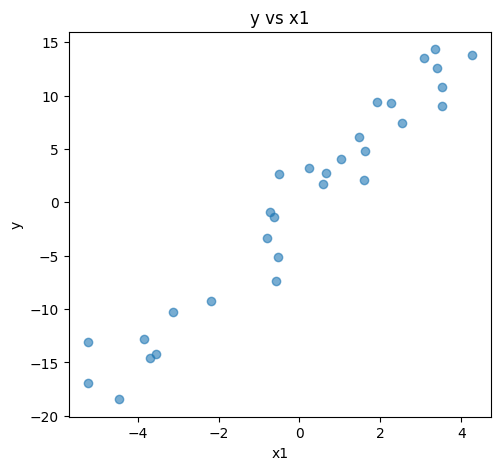

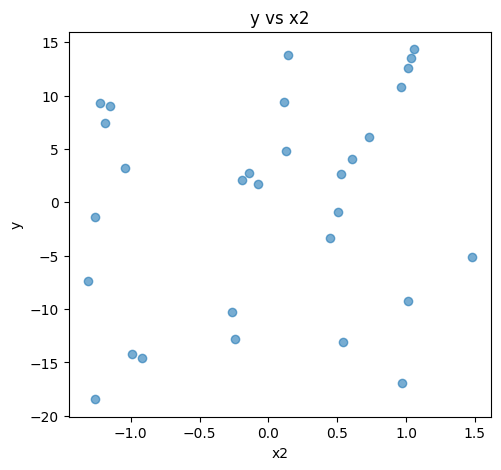

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y, label='Data', alpha=0.6)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y vs x1')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x2, y, label='Data', alpha=0.6)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y vs x2')

### Part 3: Estimating coefficients

In [22]:

#Find means
l=len(y)

mean_y=sum(y)/l
mean_x1=sum(x1)/l
mean_x2=sum(x2)/l

#Demean
y=[v - mean_y for v in y]
x1=[v - mean_x1 for v in x1]
x2=[v - mean_x2 for v in x2]

#Create x'y elements
x1y = sum([a*b for a, b in zip(x1, y)])
x2y = sum([a*b for a, b in zip(x2, y)])

#Create elements of inverse of x'x (as not to create matrix for no reason)
x1x1 = sum([a*b for a, b in zip(x1, x1)])
x1x2 = sum([a*b for a, b in zip(x1, x2)])
x2x2 = sum([a*b for a, b in zip(x2, x2)])
#Determinant
inv_det=1/(x1x1*x2x2-x1x2*x1x2)
z=-x1x2*inv_det

beta1=x2x2*inv_det*x1y+z*x2y

beta2=z*x1y+x1x1*inv_det*x2y

beta0=mean_y-mean_x1*beta1-mean_x2*beta2
print("        Intercept: ",beta0)
print("Coefficient on x1: ",beta1)
print("Coefficient on x2: ",beta2)

        Intercept:  1.8013655409730749
Coefficient on x1:  3.4107893360918777
Coefficient on x2:  0.9895123709648748
